# Titanic Dataset - Exploratory Data Analysis (EDA)

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Load the Dataset**

In [37]:
df = pd.read_csv('titanic.csv')
df.head()

,survived,pclass,name,sex,age,fare,sibsp,parch
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,0,0


In [38]:
df.shape
# Columns
print(df.columns)
# Data types and non-null counts
df.info()
# Summary stats
df.describe()

Index(['survived', 'pclass', 'name', 'sex', 'age', 'fare', 'sibsp', 'parch'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  714 non-null    int64  
 1   pclass    714 non-null    int64  
 2   name      714 non-null    object 
 3   sex       714 non-null    object 
 4   age       714 non-null    float64
 5   fare      714 non-null    float64
 6   sibsp     714 non-null    int64  
 7   parch     714 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 44.8+ KB


,survived,pclass,age,fare,sibsp,parch
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,34.694514,0.512605,0.431373
std,0.491460,0.838250,14.526497,52.918930,0.929783,0.853289
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,8.050000,0.000000,0.000000
50%,0.000000,2.000000,28.000000,15.741700,0.000000,0.000000
75%,1.000000,3.000000,38.000000,33.375000,1.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,5.000000,6.000000


**Handling Missing Data**

In [39]:
# Check missing values
df.isnull().sum()

,0
survived,0
pclass,0
name,0
sex,0
age,0
fare,0
sibsp,0
parch,0


**Convert Data Types**

In [40]:
df['pclass'] = df['pclass'].astype('category')
df['sex'] = df['sex'].astype('category')
# The 'embarked' column was not present in the data based on previous outputs, so we will not attempt to convert it.
# df['embarked'] = df['embarked'].astype('category')

**Group-Based Insights**

In [41]:
# Survival by gender
df['survived'] = df['survived'].astype(int)
df.groupby('sex', observed=False)['survived'].mean()

,survived
sex,
female,0.754789
male,0.205298


In [42]:
# Survival by class
df['survived'] = df['survived'].astype(int)
df.groupby('pclass', observed=False)['survived'].mean()

,survived
pclass,
1,0.655914
2,0.479769
3,0.239437


**Visualizations**

1. Survival by Gender – Bar Plot

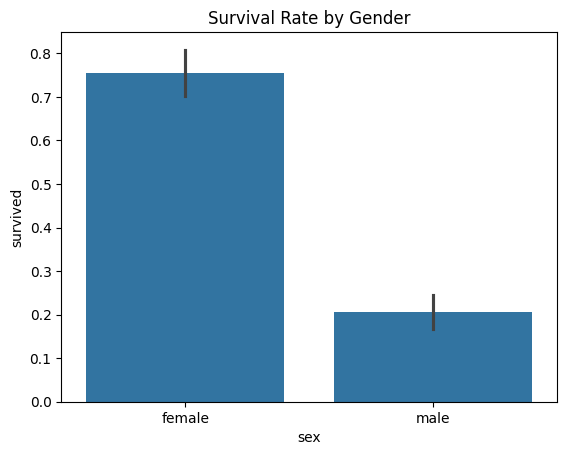

In [43]:
sns.barplot(x='sex', y='survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

2. Survival by Class – Bar Plot

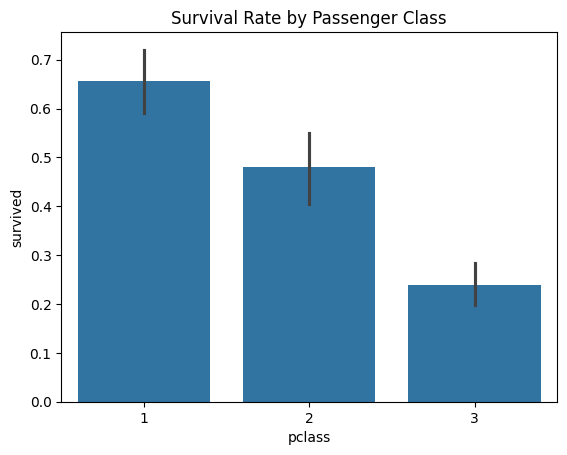

In [44]:
sns.barplot(x='pclass', y='survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

3. Heatmap of Correlation

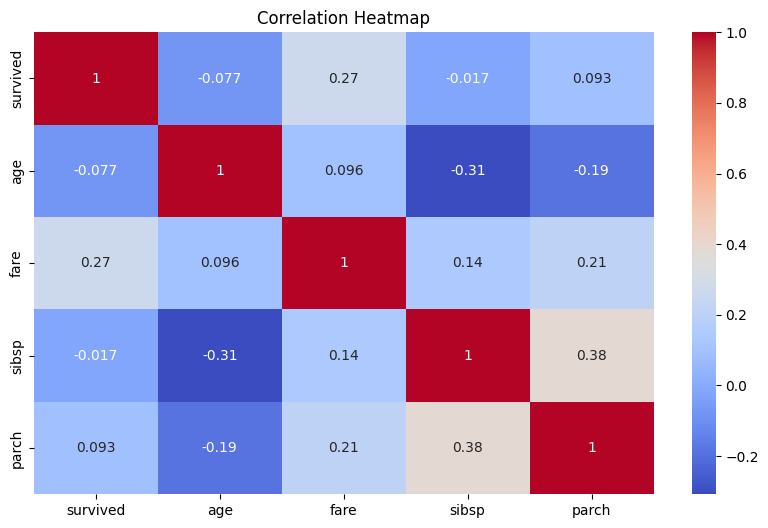

In [45]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Bonus Step: More Visualizations**

Survival by Gender & Class (Grouped Bar Plot)

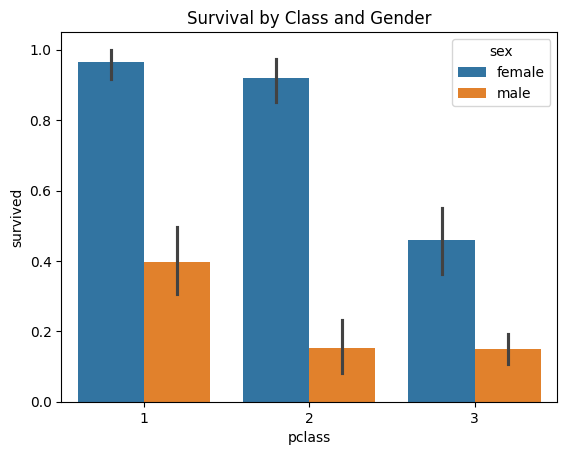

In [46]:
sns.barplot(x='pclass', y='survived', hue='sex', data=df)
plt.title('Survival by Class and Gender')
plt.show()